In [1]:
# optional but useful for debugging - reimports modules after editing and saving .py files
%load_ext autoreload
%autoreload 2

In [2]:
import astromet
import numpy as np
import matplotlib.pyplot as plt

# an object wich holds all the necessary parameters to generate the astrometric track
params=astromet.params()

# center of mass parameters
params.ra=160     #[deg]
params.dec=-50    #[deg]
params.drac=0     #[mas]
params.ddec=0     #[mas]
params.pmrac=4    #[mas/yr]
params.pmdec=3   #[mas/yr]
params.parallax=2     #[mas]

In [3]:
# random times - a very rough approximation to Gaia eDR3
ts=2016 + ((34/12)*np.sort(np.random.rand(100))-(17/12))

# optionally use the much simpler Kepler equation solver if numba causes errors
#astromet.use_backup=True

# finds the exact position in RAcos(Dec) and Dec [mas]
racs,decs=astromet.track(ts,params)

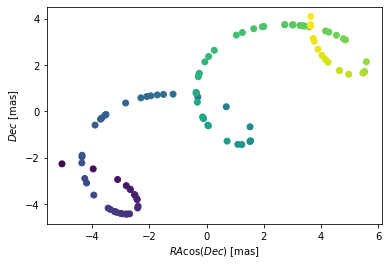

In [4]:
ax=plt.gca()
ax.scatter(racs,decs,c=ts)
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
plt.savefig('docs/plots/singleBody.png')
plt.show()

In [5]:
# binary parameters
# (for single stars leave these blank or set l=q)
params.period=2      #[yr]
params.a=2    #[AU]
params.e=0.5
params.q=0.5
params.l=0.1
# viewing angle
params.vphi=4.5   #[rad]
params.vtheta=1.5 #[rad]
params.vomega=5.6 #[rad]
# time of some periapse passage
params.tperi=2016 #[jyear]

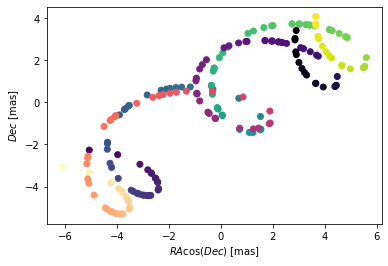

In [6]:
bracs,bdecs=astromet.track(ts,params)

ax=plt.gca()
ax.scatter(racs,decs,c=ts)
ax.scatter(bracs,bdecs,c=ts,cmap='magma_r')
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
plt.savefig('docs/plots/twoBody.png')
plt.show()

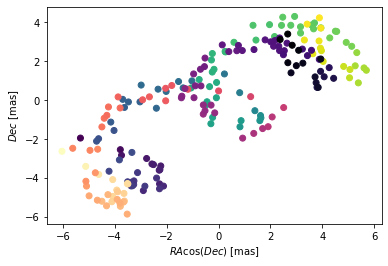

In [7]:
ast_error=0.3 # [mas]

obsracs=racs+ast_error*np.random.randn(ts.size)
obsdecs=decs+ast_error*np.random.randn(ts.size)

bobsracs=bracs+ast_error*np.random.randn(ts.size)
bobsdecs=bdecs+ast_error*np.random.randn(ts.size)

ax=plt.gca()
ax.scatter(obsracs,obsdecs,c=ts)
ax.scatter(bobsracs,bobsdecs,c=ts,cmap='magma_r')
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
plt.savefig('docs/plots/twoBodyError.png')
plt.show()

In [8]:
results=astromet.simple_fit(ts,obsracs,obsdecs,ast_error,params.ra,params.dec)
print(results)

{'vis_periods': 65, 'n_obs': 100, 'drac': 0.007177336103195382, 'drac_error': 0.030473508409263213, 'ddec': 0.032923148131002555, 'ddec_error': 0.030459894940901976, 'drac_ddec_corr': 0.00033030788762610186, 'parallax': 2.0327766235127473, 'parallax_error': 0.03418458095486792, 'drac_parallax_corr': 0.031655112935801775, 'ddec_parallax_corr': 0.010434582504759453, 'pmrac': 3.9791016202080596, 'pmrac_error': 0.03861445371928688, 'drac_pmrac_corr': -0.08645426099857322, 'ddec_pmrac_corr': 0.001670128328694504, 'parallax_pmrac_corr': 0.16005703418730174, 'pmdec': 2.9726903546661982, 'pmdec_error': 0.03815499215027732, 'drac_pmdec_corr': -0.0014191919923428312, 'ddec_pmdec_corr': -0.09313218610507622, 'parallax_pmdec_corr': -0.044832946741369284, 'pmrac_pmdec_corr': -0.007175828489300821, 'uwe': 1.0108969408686814, 'ra_ref': 160, 'dec_ref': -50}


In [9]:
bresults=astromet.simple_fit(ts,bobsracs,bobsdecs,ast_error,params.ra,params.dec)
print(bresults)

{'vis_periods': 65, 'n_obs': 100, 'drac': -0.8115159233174553, 'drac_error': 0.048460379155508417, 'ddec': -0.652910541892801, 'ddec_error': 0.048438730389979125, 'drac_ddec_corr': 0.0003303078876261019, 'parallax': 1.9101477473439563, 'parallax_error': 0.054361897950729744, 'drac_parallax_corr': 0.03165511293580178, 'ddec_parallax_corr': 0.010434582504759453, 'pmrac': 3.9648468134843884, 'pmrac_error': 0.06140648602018706, 'drac_pmrac_corr': -0.08645426099857322, 'ddec_pmrac_corr': 0.0016701283286945042, 'parallax_pmrac_corr': 0.16005703418730174, 'pmdec': 3.0386752107642065, 'pmdec_error': 0.060675829033057224, 'drac_pmdec_corr': -0.0014191919923428316, 'ddec_pmdec_corr': -0.09313218610507622, 'parallax_pmdec_corr': -0.04483294674136929, 'pmrac_pmdec_corr': -0.0071758284893008225, 'uwe': 1.6075749593292175, 'ra_ref': 160, 'dec_ref': -50}


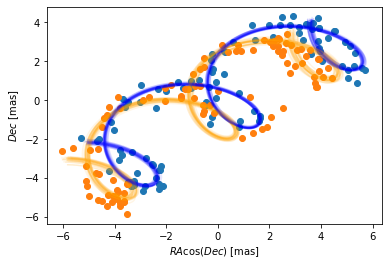

In [10]:
ax=plt.gca()
ax.scatter(obsracs,obsdecs)
ax.scatter(bobsracs,bobsdecs)

plotts=np.linspace(np.min(ts),np.max(ts),200)
fitparams=astromet.params()
bfitparams=astromet.params()
for i in range(32):
    fitparams.ra=160     #[deg]
    fitparams.dec=-50    #[deg]
    fitparams.drac=results['drac']+results['drac_error']*np.random.randn()     #[mas]
    fitparams.ddec=results['ddec']+results['ddec_error']*np.random.randn()     #[mas]
    fitparams.pmrac=results['pmrac']+results['pmrac_error']*np.random.randn()    #[mas/yr]
    fitparams.pmdec=results['pmdec']+results['pmdec_error']*np.random.randn()   #[mas/yr]
    fitparams.parallax=results['parallax']+results['parallax_error']*np.random.randn()     #[mas]
    
    fitracs,fitdecs=astromet.track(plotts,fitparams)
    ax.plot(fitracs,fitdecs,c='blue',alpha=0.1)
    
    bfitparams.ra=160     #[deg]
    bfitparams.dec=-50    #[deg]
    bfitparams.drac=bresults['drac']+bresults['drac_error']*np.random.randn()     #[mas]
    bfitparams.ddec=bresults['ddec']+bresults['ddec_error']*np.random.randn()     #[mas]
    bfitparams.pmrac=bresults['pmrac']+bresults['pmrac_error']*np.random.randn()    #[mas/yr]
    bfitparams.pmdec=bresults['pmdec']+bresults['pmdec_error']*np.random.randn()   #[mas/yr]
    bfitparams.parallax=bresults['parallax']+bresults['parallax_error']*np.random.randn()     #[mas]    

    bfitracs,bfitdecs=astromet.track(plotts,bfitparams)
    ax.plot(bfitracs,bfitdecs,c='orange',alpha=0.1)

ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
plt.savefig('docs/plots/twoBodyFit.png')
plt.show()

In [11]:
import dev.astromet.astromet as astromet
import numpy as np
import matplotlib.pyplot as plt
import scanninglaw.times

ra=160
dec=-50
c=scanninglaw.source.Source(ra,dec,unit='deg')

dr3_sl=scanninglaw.times.Times(version='dr3_nominal')
sl=dr3_sl(c, return_times=True, return_angles=True)

ts=np.squeeze(np.hstack(sl['times'])).astype('double')
sort=np.argsort(ts)
ts=2010+ts[sort]/365.25
phis=np.squeeze(np.hstack(sl['angles']))[sort].astype('double')

Loading auxilliary data ...
t = 32.241 s
  auxilliary:  16.564 s
          sf:   5.395 s
interpolator:  10.282 s


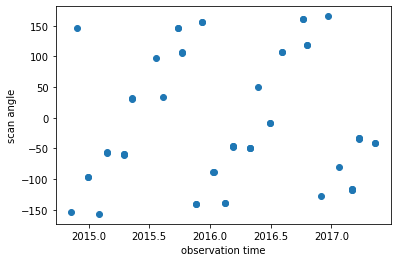

In [12]:
ax=plt.gca()
ax.scatter(ts,phis)
ax.set_xlabel(r'observation time')
ax.set_ylabel(r'scan angle')
plt.savefig('docs/plots/scanningLaw.png')
plt.show()

In [13]:
params=astromet.params()

params.ra=ra
params.dec=dec
params.drac=0
params.ddec=0
params.pmrac=8
params.pmdec=-2
params.parallax=5

params.period=2
params.a=2 
params.e=0.5
params.q=0.5
params.l=0.1

params.vphi=4.5
params.vtheta=1.5
params.vomega=5.6

params.tperi=2016

racs,decs=astromet.track(ts,params)

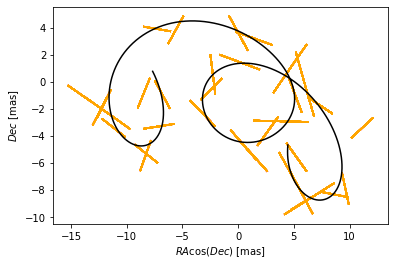

In [14]:
mag=18
al_error=astromet.sigma_ast(mag) # about 1.1 mas at this magnitude
errs=al_error*np.random.randn(phis.size)

obsracs=racs+errs*np.sin(radphis)
obsdecs=decs+errs*np.cos(radphis)

plotts=np.linspace(np.min(ts),np.max(ts),1000)
plotracs,plotdecs=astromet.track(plotts,params)

ax=plt.gca()
radphis=np.deg2rad(phis)
for i in range(ts.size):
    ax.plot([obsracs-al_error*np.sin(radphis),obsracs+al_error*np.sin(radphis)],
            [obsdecs-al_error*np.cos(radphis),obsdecs+al_error*np.cos(radphis)],c='orange')
ax.plot(plotracs,plotdecs,c='k')
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
plt.savefig('docs/plots/twoBodyScans')
plt.show()

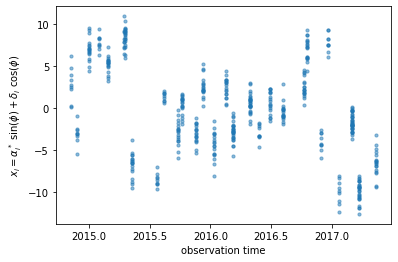

In [18]:
t_obs,x_obs,phi_obs,rac_obs,dec_obs=astromet.mock_obs(ts,phis,racs,decs,err=al_error)

ax=plt.gca()
ax.scatter(t_obs,x_obs,s=10,alpha=0.5)
ax.set_xlabel(r'observation time')
ax.set_ylabel(r'$x_i = \alpha^*_i\ \sin(\phi) + \delta_i\ \cos(\phi)$')
plt.savefig('docs/plots/scanXs.png')
plt.show()

In [19]:
bresults=astromet.gaia_fit(t_obs,x_obs,phi_obs,al_error,ra,dec)
print(bresults)

{'astrometric_matched_transits': 53, 'visibility_periods_used': 27, 'astrometric_n_obs_al': 477, 'astrometric_params_solved': 31, 'ra': 159.99999953448898, 'ra_error': 0.10037615384510779, 'dec': -50.00000033963421, 'dec_error': 0.11038242365998072, 'ra_dec_corr': 0.21302825773765552, 'parallax': 5.277859971259744, 'parallax_error': 0.13483844562537226, 'ra_parallax_corr': -0.052872670994359446, 'dec_parallax_corr': 0.06289328141887433, 'pmra': 7.623439419914979, 'pmra_error': 0.1338069839199319, 'ra_pmra_corr': -0.18965432423735637, 'dec_pmra_corr': 0.027167437980264553, 'parallax_pmra_corr': 0.19428859515007607, 'pmdec': -2.267067734571566, 'pmdec_error': 0.1445982092420638, 'ra_pmdec_corr': 0.014967778903621016, 'dec_pmdec_corr': -0.2395703521452692, 'parallax_pmdec_corr': -0.002380694025381034, 'pmra_pmdec_corr': 0.20178814356775804, 'astrometric_excess_noise': 0.9523963620056608, 'astrometric_chi2_al': 871.4482146311552, 'astrometric_n_good_obs_al': 477, 'uwe': 1.3587820245794555}